In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
# download dataset
if False: # enable if you want to download the dataset

    from urllib import request
    from shutil import copyfileobj

    data_name = "agaricus-lepiota.data"
    data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
    descr_name = "agaricus-lepiota.names"
    descr_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names"

    # download data
    with request.urlopen(data_url) as response, open(data_name, 'wb') as out_file:
        copyfileobj(response, out_file)

    # download description
    with request.urlopen(descr_url) as response, open(descr_name, 'wb') as out_file:
        copyfileobj(response, out_file)

In [4]:
# Load data
data = pd.read_csv("agaricus-lepiota.data")

# Print shape
print(data.shape)

(8123, 23)


In [5]:
# Display a few examples of the data
data.head(10)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
5,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
6,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
7,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
8,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m
9,e,x,y,y,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,n,g


In [6]:
# display how many samples of each class are in the dataset
data["p"].value_counts()

e    4208
p    3915
Name: p, dtype: int64

In [7]:
# show unique values and their counts in the feature columns
for col in data.columns[1:]:
        print(data[col].value_counts(), end="\n\n")

x    3655
f    3152
k     828
b     452
s      32
c       4
Name: x, dtype: int64

y    3244
s    2555
f    2320
g       4
Name: s, dtype: int64

n    2283
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: n, dtype: int64

f    4748
t    3375
Name: t, dtype: int64

n    3528
f    2160
s     576
y     576
l     400
a     400
p     255
c     192
m      36
Name: p.1, dtype: int64

f    7913
a     210
Name: f, dtype: int64

c    6811
w    1312
Name: c, dtype: int64

b    5612
n    2511
Name: n.1, dtype: int64

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     407
e      96
y      86
o      64
r      24
Name: k, dtype: int64

t    4608
e    3515
Name: e, dtype: int64

b    3776
?    2480
e    1119
c     556
r     192
Name: e.1, dtype: int64

s    5175
k    2372
f     552
y      24
Name: s.1, dtype: int64

s    4935
k    2304
f     600
y     284
Name: s.2, dtype: int64

w    4463
p    1872
g     576
n     448
b     432
o

In [8]:
# Remove column e.1 because it contains empty/missing values (? signals empty/missing value)
data = data.drop(["e.1"], axis=1)
data.shape

(8123, 22)

In [9]:
# Use sklearn LabelEncoder to encode categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in data.columns:
    data[col] = label_encoder.fit_transform(data[col])
    
data.head(10) # compare with examples above

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
5,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
6,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
7,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
8,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3
9,0,5,3,9,1,3,1,0,0,2,...,2,7,7,0,2,1,4,3,2,1


In [10]:
# Split data into features and labels because the next step shouldn't be applied to the labels
x = data.iloc[:, 1:] # contains features
y = data.iloc[:, 0] # contains labels

# Use sklearn OneHotEncoder to encode feature data
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, categories="auto")
x = pd.DataFrame(onehot_encoder.fit_transform(x))

x.head(10)

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# split data into training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=4)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5686, 112)
(5686,)
(2437, 112)
(2437,)


In [12]:
# train logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="lbfgs")
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
# calculate score of the trained model
model.score(x_test, y_test)

1.0

In [14]:
# calculate precision and recall from predictions and groundtruth
import numpy as np
def calc_precision_recall(y, prediction):
    tp_, fp_, fn_ = np.zeros(y.shape), np.zeros(y.shape), np.zeros(y.shape)

    tp_[(y == 1) & (prediction == 1)] = 1
    tp = sum(tp_)

    fp_[(y == 0) & (prediction == 1)] = 1
    fp = sum(fp_)

    fn_[(y == 1) & (prediction == 0)] = 1
    fn = sum(fn_)

    precision = tp / (tp + fp + 0.000000000001)
    recall = tp / (tp + fn + 0.000000000001)
    return round(precision,4), round(recall,4)

In [15]:
# show a few predictions and compare them to the groundtruth
y_prob = model.predict_proba(x_test)[:,1] 
y_pred = np.where(y_prob > 0.5, 1, 0) # apply threshold

# calculate recall and precision
precision, recall = calc_precision_recall(y_test, y_pred)
print("Recall: {}".format(recall))
print("Precision: {}".format(precision))

Recall: 1.0
Precision: 1.0


In [16]:
# print the results
print(list(y_pred)[:40])
print(list(y_test)[:40])

[0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]
[0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]


In [17]:
# learning curve
from IPython.display import clear_output
def determine_learning_curve(x_train, y_train, x_test, y_test, step_size):
    steps_list = []
    precision_list = []
    recall_list = []
    
    how_much_train = step_size
    while how_much_train < x_train.shape[0]:
        clear_output(wait=True)
        print("\r" + "Current training data: {}/{}".format(how_much_train, x_train.shape[0]))
        
        # train model
        model = LogisticRegression(solver="lbfgs")
        model.fit(x_train[:how_much_train], y_train[:how_much_train])

        # calculate recall and precision
        y_prob = model.predict_proba(x_test)[:,1] 
        y_pred = np.where(y_prob > 0.5, 1, 0)
        precision, recall = calc_precision_recall(y_test, y_pred)
        
        precision_list.append(precision)
        recall_list.append(recall)
        steps_list.append(how_much_train)
        how_much_train += step_size
    
    clear_output(wait=True)    
    return steps_list, precision_list, recall_list

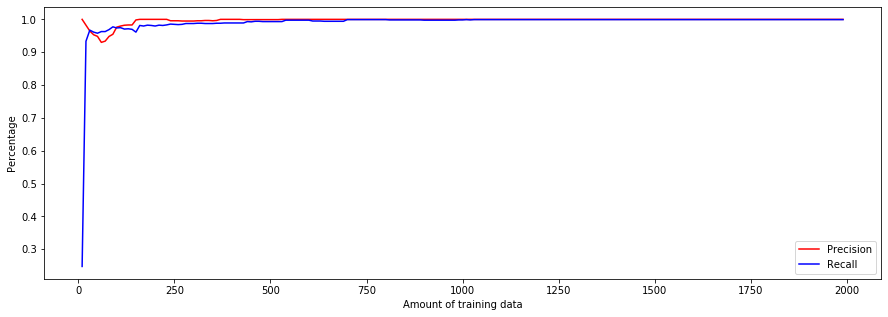

In [18]:
# get learning curve data
steps_list, precision_list, recall_list = determine_learning_curve(x_train[:2000], y_train[:2000], x_test, y_test, 10)

# plot learning curve for both precision and recall
import matplotlib.pyplot as plt
plt.figure(1, figsize=(15, 5))
plt.xlabel("Amount of training data")
plt.ylabel("Percentage")
plt.plot(steps_list, precision_list, "r-")
plt.plot(steps_list, recall_list, "b-")
plt.legend(["Precision", "Recall"])
plt.show()